## Introduction:
Since leaving a job has various effects on management, we visualize the exhaustion situation due to organizational change of the management team and retention of employees. (By logistic regression)

Objectives Logistic regression should be used to model the probability of employee fatigue. The results thus obtained are used to understand what changes management needs to make to the workplace in order to retain most of its employees.

At this project we will focus Why employees leave the company? The goal of this kernel is to predict Attrition and analyzing the factors causing. 

## work Step:
### 1) import Libraries, data and display data
### 2) prepare data to analysis
### 3) cleaning data
### 4) EDA
### 5) select Model

##### Description Variable:

In [56]:
dic = pd.read_excel('data_dictionary.xlsx')
dic

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


## 1) importing libraries, Data and display data :

first step load libraries and data will be used in project

In [1]:
# Imported necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read files and covert to datadrame

emp = pd.read_csv('employee_survey_data.csv')
empinfo = pd.read_csv('general_data.csv')
intime = pd.read_csv('in_time.csv')
outtime = pd.read_csv('out_time.csv')
manger_sur = pd.read_csv('manager_survey_data.csv')

In [3]:
#give names to each data file in order to display data:
emp.name = 'Employee Survey data'
empinfo.name = 'General data'
intime.name = 'Log in time data'
outtime.name = 'Log out time data'
manger_sur.name = 'Manager Survey data'

In [4]:
# collect main dataset in list and display col and row
emp_file = [emp,empinfo,manger_sur]
for file in emp_file:
    print(file.name)
    print(file.head(2).T)
    print('-'*30)

Employee Survey data
                           0    1
EmployeeID               1.0  2.0
EnvironmentSatisfaction  3.0  3.0
JobSatisfaction          4.0  2.0
WorkLifeBalance          2.0  4.0
------------------------------
General data
                                                 0                       1
Age                                             51                      31
Attrition                                       No                     Yes
BusinessTravel                       Travel_Rarely       Travel_Frequently
Department                                   Sales  Research & Development
DistanceFromHome                                 6                      10
Education                                        2                       1
EducationField                       Life Sciences           Life Sciences
EmployeeCount                                    1                       1
EmployeeID                                       1                       2
Gender         

In [5]:
# display time when emloyee start work for each day
intime.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [6]:
# display time when emloyee end work for each day
outtime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## 2) prepare data to analysis

### in this step we will prepare data to analysis.
#### 1) calcolate how much employee work hour in day during 2015.
#### 2) convert time from hour to second.
#### 3) convert time in and time out to second
#### 4) calcolte maen and std to time in and time out for each emplyee and add it in empinfo
#### 5) calc std_time and add in empinfo 
#### 6) concat to data file 


In [7]:
# here we removed calender from time in and time out by using apply() and calcolate how much employee work hour 
intime = intime.apply(pd.to_datetime)
outtime = outtime.apply(pd.to_datetime)

time = outtime - intime
time.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,NaT,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,...,NaT,07:20:21,07:23:45,06:30:17,07:35:47,NaT,07:46:26,07:18:54,07:46:44,07:04:49
1,0 days,NaT,08:06:33,07:27:17,NaT,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,...,07:54:11,07:45:14,07:42:44,07:26:08,NaT,NaT,07:36:53,07:58:57,07:59:10,08:13:38
2,0 days,NaT,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,NaT,07:01:26,07:26:20,07:32:20,06:47:11
3,0 days,NaT,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,NaT,07:26:50,07:25:00,07:21:59,07:07:59
4,0 days,NaT,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,NaT,07:39:44,08:16:07,07:57:12,08:01:05


In [8]:
#convert time to float by convert hour to second 
time = time/ np.timedelta64(1, 's')
time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,NaN,25950.0,25883.0,26679.0,25224.0,26243.0,26944.0,26146.0,28192.0,...,NaN,26421.0,26625.0,23417.0,27347.0,NaN,27986.0,26334.0,28004.0,25489.0
1,0.0,NaN,29193.0,26837.0,NaN,26629.0,26700.0,25743.0,27401.0,26204.0,...,28451.0,27914.0,27764.0,26768.0,NaN,NaN,27413.0,28737.0,28750.0,29618.0
2,0.0,NaN,24093.0,26156.0,23059.0,24354.0,26442.0,24701.0,26707.0,25199.0,...,24429.0,25789.0,24486.0,24229.0,24659.0,NaN,25286.0,26780.0,27140.0,24431.0
3,0.0,NaN,26418.0,26251.0,24995.0,24910.0,24663.0,25895.0,25195.0,26303.0,...,27465.0,24648.0,26375.0,26689.0,25506.0,NaN,26810.0,26700.0,26519.0,25679.0
4,0.0,NaN,29000.0,28757.0,27657.0,28102.0,27584.0,27798.0,30114.0,29726.0,...,28453.0,27594.0,28647.0,28033.0,29698.0,NaN,27584.0,29767.0,28632.0,28865.0


In [9]:
# conver time in and time out to second
intime = intime.applymap(lambda x: 3600*x.hour + 60*x.minute + x.second)
outtime = outtime.applymap(lambda x: 3600*x.hour + 60*x.minute + x.second)

In [10]:
# add new colume to empinfo by calc mean and standerdevition to intime and outfile
empinfo['in_mean'] = intime.mean(axis=1)
empinfo['out_mean'] = outtime.mean(axis=1)

empinfo['in_std'] = intime.std(axis=1)
empinfo['out_std'] = outtime.std(axis=1)

In [11]:
empinfo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,in_mean,out_mean,in_std,out_std
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,1.0,6,1,0,0,35850.592275,62281.806867,2535.789701,4312.023688
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,6.0,3,5,1,4,35805.345992,63476.383966,2562.172615,4405.660126
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,5.0,2,5,0,3,35941.699588,61085.465021,2514.047526,4182.861335
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,13.0,5,8,7,5,35782.322034,61569.830508,2550.642350,4282.739716
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,9.0,2,6,0,4,35848.256098,64553.321138,2493.752608,4382.296104


In [12]:
#Put working hours in empinfo
empinfo['time_std'] = empinfo['out_std'] - empinfo['in_std']
empinfo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,in_mean,out_mean,in_std,out_std,time_std
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,35850.592275,62281.806867,2535.789701,4312.023688,1776.233987
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,35805.345992,63476.383966,2562.172615,4405.660126,1843.487511
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,35941.699588,61085.465021,2514.047526,4182.861335,1668.813809
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,35782.322034,61569.830508,2550.642350,4282.739716,1732.097366
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,35848.256098,64553.321138,2493.752608,4382.296104,1888.543496


In [13]:
#concat general, employee, manger_sur in one datafrarm 
emp.set_index('EmployeeID', inplace=True)
empinfo.set_index('EmployeeID', inplace=True)
manger_sur.set_index('EmployeeID', inplace=True)


In [14]:
data = pd.concat(emp_file, axis = 1)

In [15]:
data.head(3).T

EmployeeID,1,2,3
EnvironmentSatisfaction,3,3,2
JobSatisfaction,4,2,2
WorkLifeBalance,2,4,1
Age,51,31,32
Attrition,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently
Department,Sales,Research & Development,Research & Development
DistanceFromHome,6,10,17
Education,2,1,4
EducationField,Life Sciences,Life Sciences,Other


In [16]:
data.shape

(4410, 33)

## 3) cleaning data
### in this step, we will fill missing if is existing by using mean for each colume. And check if there any non unique  variable and droped because it doesn't add any information.

In [17]:
# find sum null value for each colume
data.isnull().sum()

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
in_mean                     0
out_mean                    0
in_std                      0
out_std                     0
time_std                    0
JobInvolvement              0
PerformanceRating           0
dtype: int

In [18]:
# fill null value 
data["NumCompaniesWorked"].replace(np.nan,data["NumCompaniesWorked"].astype('float').mean(axis = 0 ),inplace = True)
data["TotalWorkingYears"].replace(np.nan,data["TotalWorkingYears"].astype('float').mean(axis = 0 ),inplace = True)
data["EnvironmentSatisfaction"].replace(np.nan,data["EnvironmentSatisfaction"].astype('float').mean(axis = 0 ),inplace = True)
data["JobSatisfaction"].replace(np.nan,data["JobSatisfaction"].astype('float').mean(axis = 0 ),inplace = True)
data["WorkLifeBalance"].replace(np.nan,data["WorkLifeBalance"].astype('float').mean(axis = 0 ),inplace = True)

In [19]:
#check if there any columes have null value
data.isnull().any()

EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
in_mean                    False
out_mean                   False
in_std                     False
out_std                    False
time_std  

In [20]:
#Checking unique values in every column
data.nunique()

EnvironmentSatisfaction       5
JobSatisfaction               5
WorkLifeBalance               5
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           11
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            41
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
in_mean                    4402
out_mean                   4410
in_std                     4410
out_std                    4410
time_std                   4410
JobInvol

In [21]:
#drop columes non-unquie
data.drop(['EmployeeCount', 'Over18','StandardHours'], axis=1,inplace = True)

In [22]:
data.head(2).T

EmployeeID,1,2
EnvironmentSatisfaction,3,3
JobSatisfaction,4,2
WorkLifeBalance,2,4
Age,51,31
Attrition,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently
Department,Sales,Research & Development
DistanceFromHome,6,10
Education,2,1
EducationField,Life Sciences,Life Sciences


## 4)Exploratory Data Analysis 
#### in this step, we display the catogrical variables( Marialstatus,gender,job role, edu field,departmant,busineestravels,environment satisfaction and job satisfaction) and numerical(Age, Monthly income, time andTotalWorkingYears )based on the attrition and show number employee leave company 

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  882     1767    1050
Yes                  99      252     360


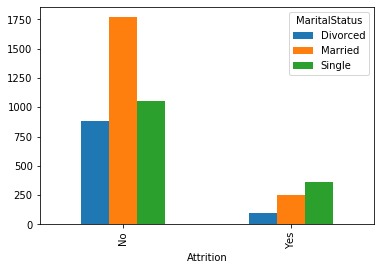

In [23]:
# Differences in marital status

df_mar = pd.crosstab(data['Attrition'], data['MaritalStatus'])
print(df_mar)

df_mar.plot.bar()

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               336              135                    651   
Yes                               57               21                    126   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No             264                     387                183   
Yes             42                      48                 57   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        717              813                   213  
Yes                       159              165                    36  


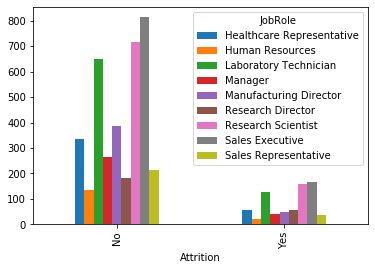

In [24]:
# Differences in JobRole

df_job = pd.crosstab(data['Attrition'], data['JobRole'])
print(df_job)

df_job.plot.bar()


Gender     Female  Male
Attrition              
No           1494  2205
Yes           270   441


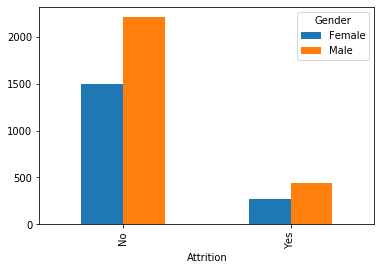

In [25]:
# Gender differences

df_gen = pd.crosstab(data['Attrition'], data['Gender'])
print(df_gen)

df_gen.plot.bar()

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           48           1515        402     1167    216   
Yes                          33            303         75      225     30   

EducationField  Technical Degree  
Attrition                         
No                           351  
Yes                           45  


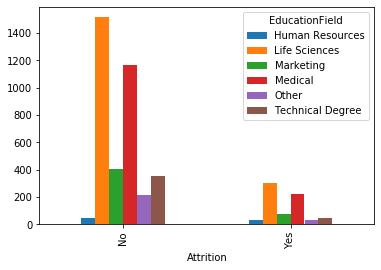

In [27]:
# Differences in edu field

df_edu = pd.crosstab(data['Attrition'], data['EducationField'])
print(df_edu)

df_edu.plot.bar()

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                      132                    2430   1137
Yes                      57                     453    201


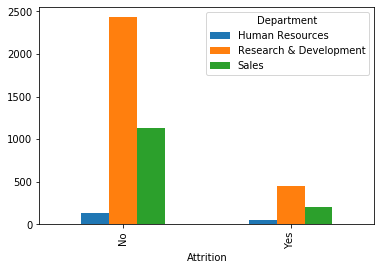

In [28]:
# Retirement number by department

df_dep = pd.crosstab(data['Attrition'], data['Department'])
print(df_dep)

df_dep.plot.bar()

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     414                624           2661
Yes                     36                207            468


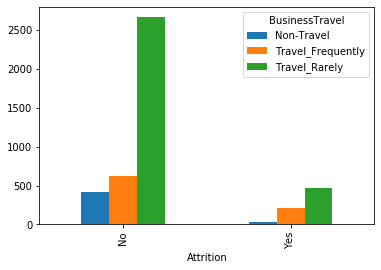

In [29]:
# Number of retirements by business Travel

df_biz = pd.crosstab(data['Attrition'], data['BusinessTravel'])
print(df_biz)

df_biz.plot.bar()

EnvironmentSatisfaction  1.000000  2.000000  2.723603  3.000000  4.000000
Attrition                                                                
No                            632       728        20      1164      1155
Yes                           213       128         5       186       179


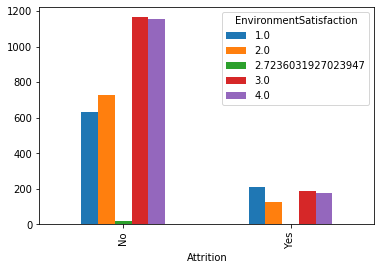

In [30]:
# Number of retirees by environmental satisfaction

df_es = pd.crosstab(data['Attrition'], data['EnvironmentSatisfaction'])
print(df_es)
df_es.plot.bar()

JobSatisfaction  1.000000  2.000000  2.728246  3.000000  4.000000
Attrition                                                        
No                    663       702        19      1104      1211
Yes                   197       138         1       219       156


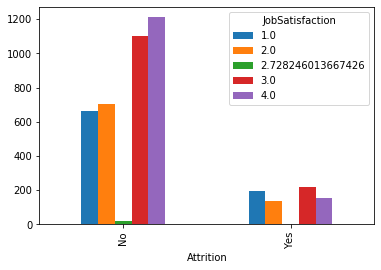

In [31]:
# Number of retirees by job satisfaction
df_js = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
print(df_js)
df_js.plot.bar()

WorkLifeBalance  1.000000  2.000000  2.761436  3.000000  4.000000
Attrition                                                        
No                    164       848        34      2280       373
Yes                    75       171         4       380        81


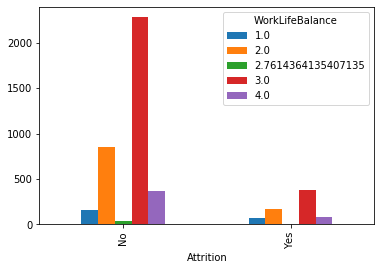

In [32]:
# Number of retirees by work life balance
df_wb = pd.crosstab(data['Attrition'], data['WorkLifeBalance'])
print(df_wb)
df_wb.plot.bar()

JobInvolvement    1    2     3    4
Attrition                          
No              195  945  2205  354
Yes              54  180   399   78


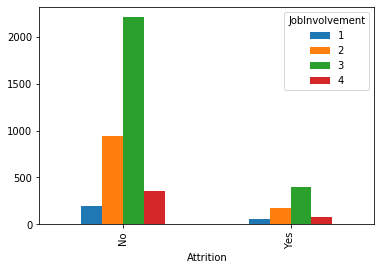

In [33]:
# Number of retirees by rating job involvement

df_jb = pd.crosstab(data['Attrition'], data['JobInvolvement'])
print(df_jb)
df_jb.plot.bar()

PerformanceRating     3    4
Attrition                   
No                 3144  555
Yes                 588  123


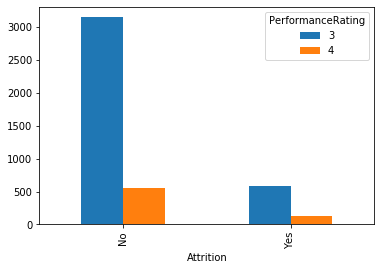

In [34]:
#Number of retirees by performance rating

df_pr = pd.crosstab(data['Attrition'], data['PerformanceRating'])
print(df_pr)
df_pr.plot.bar()

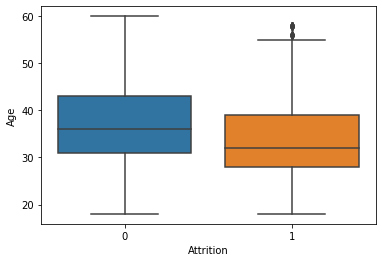

In [57]:
sns.boxplot(x="Attrition", y="Age", data=data)

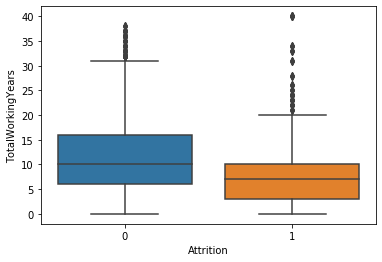

In [58]:
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=data)

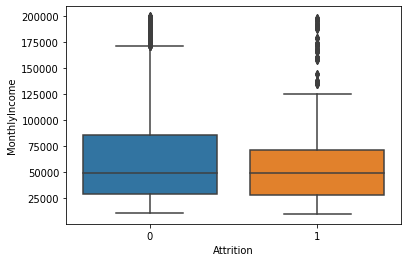

In [59]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=data)

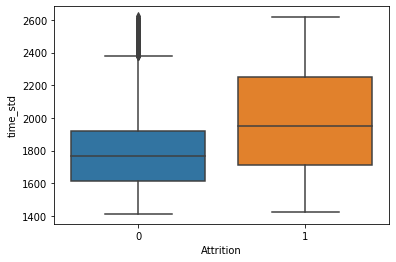

In [60]:
sns.boxplot(x="Attrition", y="time_std", data=data)

###### There is some data of object type which must be converted to numerical data

In [35]:
#check data types
data.dtypes

EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
in_mean                    float64
out_mean                   float64
in_std                     float64
out_std                    float64
time_std                   float64
JobInvolvement      

In [36]:
#Convert data opject to numercal
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department'] = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['Gender'] = labelEncoder_X.fit_transform(data['Gender'])
data['JobRole'] = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelEncoder_X.fit_transform(data['MaritalStatus'])
data['Attrition'] = labelEncoder_X.fit_transform(data['Attrition'])

##### corelation gives us understanding about how strongly the features are linearly corelated (whether positively or negatively)

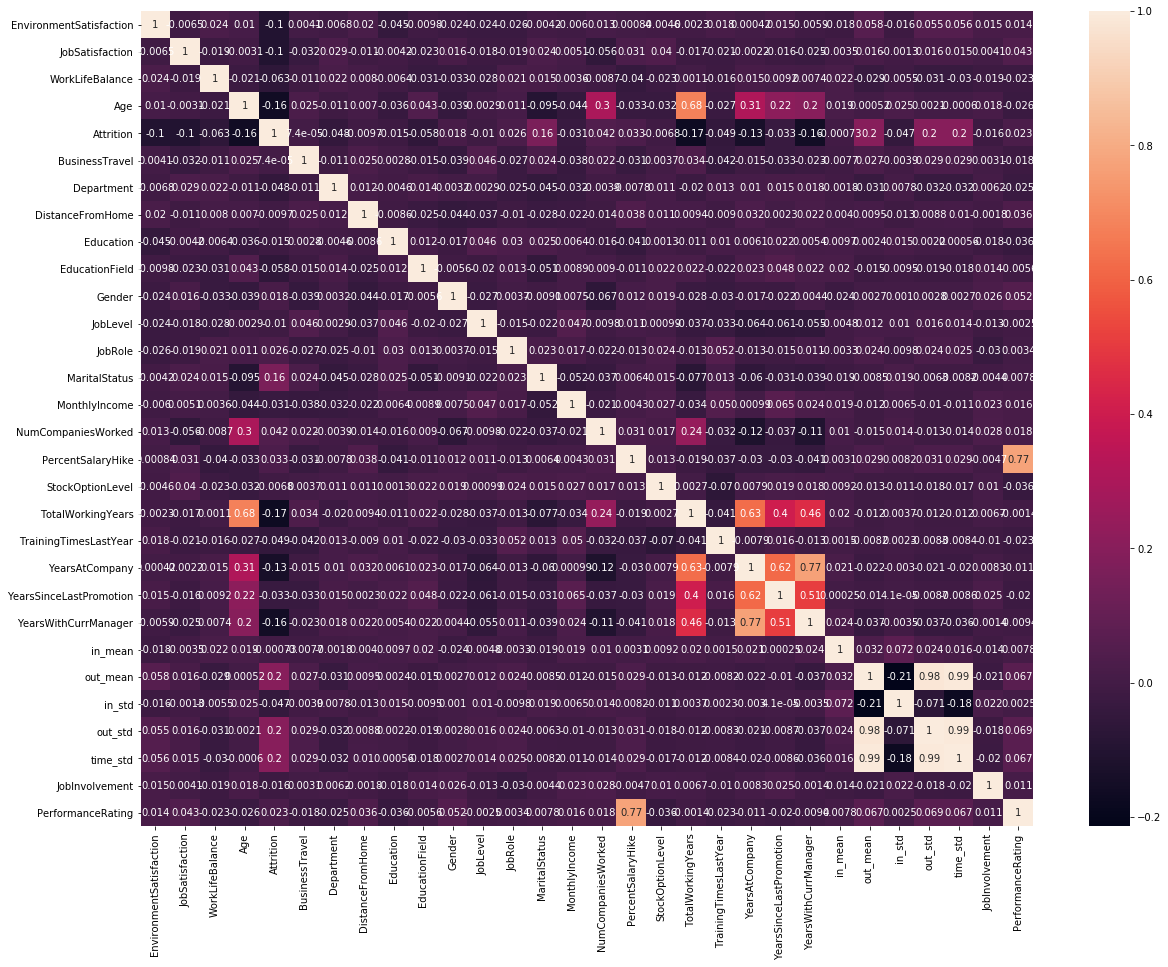

In [37]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True)
plt.show()

### 5) Select Modeling

In [38]:
col_imp = data[['time_std', 'TotalWorkingYears', 'MaritalStatus', 'YearsWithCurrManager',
      'Age','YearsAtCompany', 'EnvironmentSatisfaction', 'JobSatisfaction']]

In [39]:
X = col_imp
y = data['Attrition']

In [40]:
#import sklearn libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_auc_score

In [53]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]
print("ROC Score:{}".format(roc_auc_score(y_test, y_pred_prob)))
print("accuracy:{}".format(accuracy_score(y_test,y_pred)))


ROC Score:0.7640717152408476
accuracy:0.8560090702947846


In [55]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       731
           1       0.80      0.21      0.34       151

    accuracy                           0.86       882
   macro avg       0.83      0.60      0.63       882
weighted avg       0.85      0.86      0.82       882

[[723   8]
 [119  32]]


The model predicts 40 cases of attrition, out of which 32 employees actually have left the company. There are 8 false positives, what gives us pretty poor precision score = 0.80. Model also didn't catch 119 of employees who actually left the company, hence very low recall score = 0.21. Let's try to improve that.

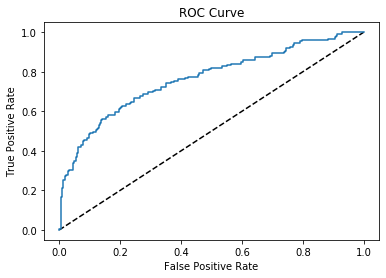

In [49]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: avg precision=0.30')

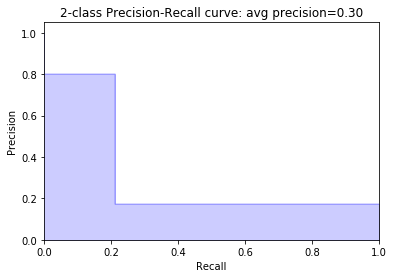

In [50]:
# Calculate average precision and the PR curve

average_precision = average_precision_score(y_test, y_pred)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# --- plotting Precision-Recall curve -----
from inspect import signature


# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: avg precision={0:0.2f}'.format(average_precision))

In [51]:
# Setup the hyperparameter grid
from sklearn.model_selection import GridSearchCV

c_log_space = np.logspace(-5, 8)
cl_weight = [{0:1,1:1},{0:1,1:1.5},{0:1,1:2},{0:1,1:2.5},{0:1,1:4},{0:1,1:6}, 'balanced']

param_grid = { 'C': c_log_space, 'class_weight': cl_weight}


# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(estimator = lr, param_grid= param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameters: {'C': 0.0044984326689694485, 'class_weight': {0: 1, 1: 2.5}}
Best score is 0.7650893673343083


In [52]:
# Obtain the predictions from our tuned model:
y_pred_cv = logreg_cv.predict(X_test)

# Compute predicted probabilities for tuned model: y_pred_prob_cv
y_pred_prob_cv = logreg_cv.predict_proba(X_test)[:,1]

# Print the ROC curve, classification report and confusion matrix for tuned model:
print("Accuracy :{}".format(accuracy_score(y_test,y_pred_cv)))
print("ROC AUC score:\n {} \n\n Classification report:\n{}\n\n Confusion matrix:\n {}".format(roc_auc_score(y_test, y_pred_prob_cv),
                                                                                            classification_report(y_test, y_pred_cv),
                                                                                              confusion_matrix(y_test, y_pred_cv)))

Accuracy :0.8480725623582767
ROC AUC score:
 0.7613810347795364 

 Classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       731
           1       0.58      0.40      0.48       151

    accuracy                           0.85       882
   macro avg       0.73      0.67      0.69       882
weighted avg       0.83      0.85      0.84       882


 Confusion matrix:
 [[687  44]
 [ 90  61]]


The tuned model predicts 101 cases of attrition, out of which 61 employees actually have left the company. The 44 of false positives result in lower precision score (0.58 comparing to 0.80 in the first model). The tuned model didn't detect 'only' 90 of employees who actually left the company (first model - 119), what results in higher recall score = 0.41.